<h1> Associate Exercise - coding analysis document </h1>

<h4>This document includes an exploratory analysis of the provided dataset as well as the coding analyses for Part I, Part II and Part III. </h4>





<h7> Note: The analysis for Part I was also conducted in the Excel document, where it could be found at the sheet <i> PartIA </i> and <i>PartIB</i> </h7>



In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

In [95]:
# Import the meta data
df = pd.read_excel('Data for Associate Exercise_GJ.xlsx',sheet_name=8)

# Exploratory analysis

### Weekend effect

Question to answer: Was the paid attendance impacted by the day of game? 

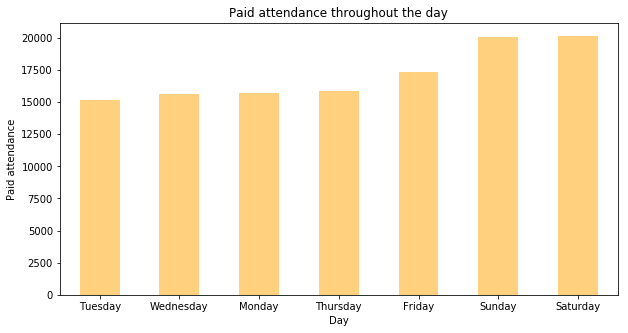

In [97]:
df_day = df[['Game Date','Paid Attendance','Day']]
df_day.set_index('Game Date',drop=True,inplace=True)
plt.figure(figsize=(10,5))
df_day.groupby('Day')['Paid Attendance'].mean().sort_values(ascending = True).plot(kind='bar',color='orange',alpha=0.5)
plt.title('Paid attendance throughout the day')
plt.ylabel('Paid attendance')
plt.xticks(rotation = 360)
plt.savefig('weekend_effect.png', dpi=96, bbox_inches='tight')

<b> Observation of figure </b>

Saturday and Sunday had the highest average paid attendance. This was not surprising because the general public usually do not work during the weekend.

It could be concluded that there was a weekend effect on the paid attendance

### Gametime effect

Question to answer: Did the game time affect the attendance and the no-show rate?

#### Game time effect on Paid Attendance

In [530]:
# Extract the columns to a separate data frame
df_gtime = df[['Game Date','Day','Paid Attendance','No-Show Rate','Game Time']]
df_gtime.set_index('Game Date',drop=True,inplace=True)

# Organize the data by grouping it by game time
gtime_PA = df_gtime.groupby('Game Time')['Paid Attendance']
gtime_noshow = df_gtime.groupby('Game Time')['No-Show Rate']

# Organize the data by grouping it by day and game time
gtime_Day = df_gtime.groupby(['Day','Game Time'])['Game Time']
gtime_Day = pd.DataFrame(gtime_Day.count())

gtime_Day = gtime_Day.sort_values(['Day','Game Time'])
gtime_Day

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'Game Time' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


Game Time
Day       Game Time           
Friday    13:07:00           1
          19:07:00          73
Monday    12:37:00           1
          13:07:00           4
          19:07:00          34
Saturday  16:07:00          10
          13:07:00          68
Sunday    13:07:00          77
Thursday  15:37:00           1
          12:37:00           3
          13:07:00           3
          19:07:00          37
Tuesday   12:37:00           2
          13:07:00           2
          19:07:00          63
Wednesday 16:37:00           1
          13:07:00           2
          16:07:00           3
          12:37:00           7
          19:07:00          58

<b> Observation of table </b>

During the weekdays, games usually started at 7 pm, whereas games typically started in the afternoon during weekends. 

It's believed that this schedualing was to accomodate the workhours of general public during the weekdays, so there was not much flexibilty in terms of altering the game time for the weekdays

Text(0,0.5,'Paid Attendance')

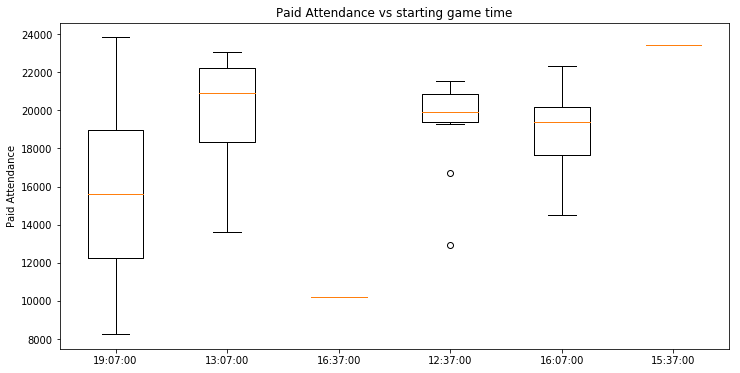

In [8]:
gametime = df_gtime['Game Time'].unique()

boxplot_data_pa = []
for i in range(len(gametime)):
    boxplot_data_pa.append(df_gtime[df_gtime['Game Time']==gametime[i]]['Paid Attendance'])

fig = plt.figure(1, figsize=(12, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplot_data_pa)
plt.xticks(np.arange(1,7),gametime)
plt.title('Paid Attendance vs starting game time')
plt.ylabel('Paid Attendance')

<b> Observation of figure </b>

The above figure showed the distribution of paid attendance by the game time. Games starting at 7:07 pm had the largest variance since they were the most frequent game time and they only took place during the weekdays. Perhaps a more in-depth exploration on Games at 7:07pm should be carried out to understand the causes of such various attendance

#### Game time effect on no-show rate

Text(0,0.5,'No-show rate')

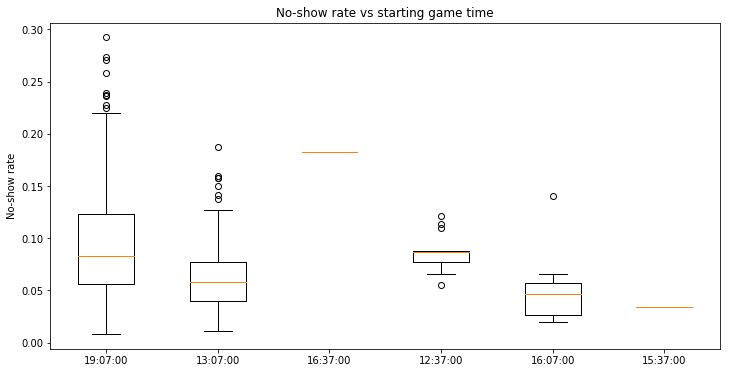

In [480]:
boxplot_data_noshow = []
for i in range(len(gametime)):
    boxplot_data_noshow.append(df_gtime[df_gtime['Game Time']==gametime[i]]['No-Show Rate'])

fig = plt.figure(1, figsize=(12, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplot_data_noshow)
plt.xticks(np.arange(1,7),gametime)
plt.title('No-show rate vs starting game time')
plt.ylabel('No-show rate')

<b> Observation of figure </b>

Similar to the last figure, games starting at 7:07 pm had the largest variance and biggest range of No-show rate than other times. Games starting at 13:07 and 16:07 had lower median and smaller range of no-show rate because these games took place during the weekend.

Games starting at 16:37 and 15:37 didn't have large sample size, so it may need more sample size or additional information for explanation

### Promotion effect

Question to answer: How did promotions affect the paid attendance?

In [18]:
# Extract Game Date',Paid Attendance, and Promotion for analysis

df_promotion = df[['Game Date','Paid Attendance','Promotion']]
df_promotion.set_index('Game Date',drop=True,inplace=True)

# extract data associated to promotion and no promotion
df_promo = df_promotion[df_promotion['Promotion'] != 'None']
df_no_promo = df_promotion[df_promotion['Promotion'] == 'None']

Text(0,0.5,'Paid attendance')

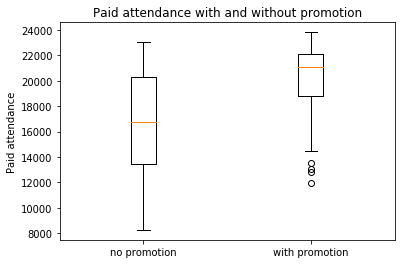

In [19]:
plt.boxplot([df_no_promo['Paid Attendance'],df_promo['Paid Attendance']])
plt.xticks(np.arange(1,3),['no promotion','with promotion'])
plt.title('Paid attendance with and without promotion')
plt.ylabel('Paid attendance')

<b> Observation of figure </b>

Games without promotion had a larger variance and lower median of attendance than games with promotion. Additionally, games with promotion in general had a narrower range of attendance. Despite a few outliers, it's evidant that having promotion will incentivize fans to attend the game 

Text(0,0.5,'Paid attendance')

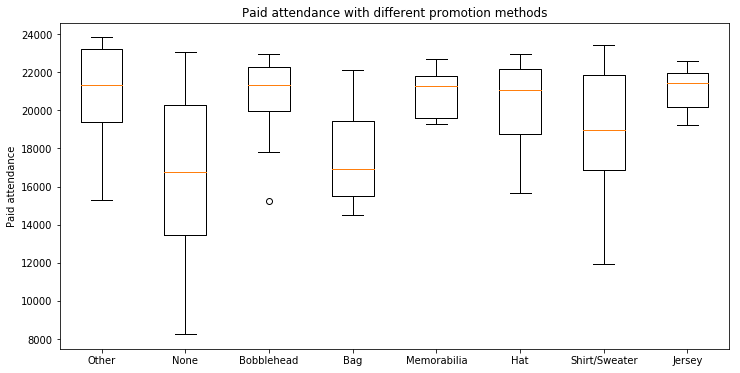

In [20]:
promotion_methods = df_promotion['Promotion'].unique()
boxplot_data = []

for i in range(len(promotion_methods)):
    boxplot_data.append(df_promotion[df_promotion['Promotion']==promotion_methods[i]]['Paid Attendance'])

fig = plt.figure(1, figsize=(12, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplot_data)
plt.xticks(np.arange(1,9),promotion_methods)
plt.title('Paid attendance with different promotion methods')
plt.ylabel('Paid attendance')

<b> Observation of figure </b>

Games without promotion had the largest variance and lowest median of attendance. A possible reason for large variance might be that the fan were motivated to attend games by other factors, such as the opponents, game time, etc

Using the median of attendance of games without promotion as benchmark, all promotion methods except bag improved the median and lowered the variance of attendance. General speaking, including these promotion methods seemed to have positive impact on attendance.

Using bag as promotion method seemed to have litte impact on attendance. In fact, its median was almost equal to the games without promotion. Though it narrowed the variance of paid attendance, the range was still within the range of games without promotion. It could be interpreted that bag was not an effective promotion method

Text(0.5,0,'season tickets sold')

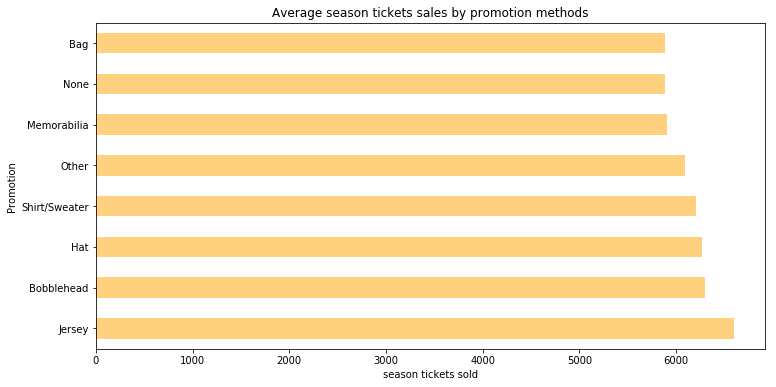

In [210]:
df_promotion_v2 = df[['Season','Season Tickets Sold','Promotion']]
Szn_tickets_sales = pd.DataFrame(df_promotion_v2.groupby('Promotion')['Season Tickets Sold'].mean().sort_values(ascending=False))
Szn_tickets_sales = Szn_tickets_sales.apply(lambda x: x.astype(int))
Szn_tickets_sales.plot(kind='barh',
                       figsize=(12,6),
                       title='Average season tickets sales by promotion methods',
                       legend=False,
                       color='orange',alpha=0.5)

plt.xlabel('season tickets sold')

<b> Observation of figure </b>

The Games with promotion of bag had the lowest average season ticket sales over the past 5 seasons. Thus, the team should decrease using bag to promote season tickets. 

Using jersey and bobblehead were observed to be the best method in relation to season tickets sales so they should be further examined for their significance. 

### Promotion effect on 7 pm game 

As observed from above, 7 pm games have the lowest attendance and no-show rate. It would be worthwhile to see if promotion could incentivize fans to attend the games, subsequently increasing total ticket revenue 

In [ ]:
df_7pm_game = df[df['Game Time'] == '19:07:00']
df_7pm_game = df_7pm_game[['Game Date','Promotion','Total Ticket Revenue','Paid Attendance','No-Show Rate']]
df_7pm_game.set_index('Game Date',drop=True,inplace=True)

promotion_methods = df_7pm_game['Promotion'].unique()
boxplot_7pm_rev = []
boxplot_7pm_pa = []
boxplot_7pm_noshow = []


for i in range(len(promotion_methods)):
    boxplot_7pm_rev.append(df_7pm_game[df_7pm_game['Promotion']==promotion_methods[i]]['Total Ticket Revenue'])
    boxplot_7pm_pa.append(df_7pm_game[df_7pm_game['Promotion']==promotion_methods[i]]['Paid Attendance'])
    boxplot_7pm_noshow.append(df_7pm_game[df_7pm_game['Promotion']==promotion_methods[i]]['No-Show Rate'])

Text(0,0.5,'Paid attendance')

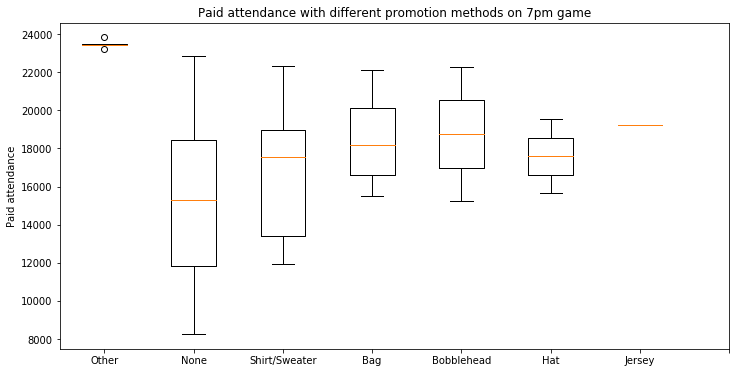

In [503]:
fig = plt.figure(1, figsize=(12, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplot_7pm_pa)
plt.xticks(np.arange(1,9),promotion_methods)
plt.title('Paid attendance with different promotion methods on 7pm game')
plt.ylabel('Paid attendance')

Text(0,0.5,'Total ticket revenue')

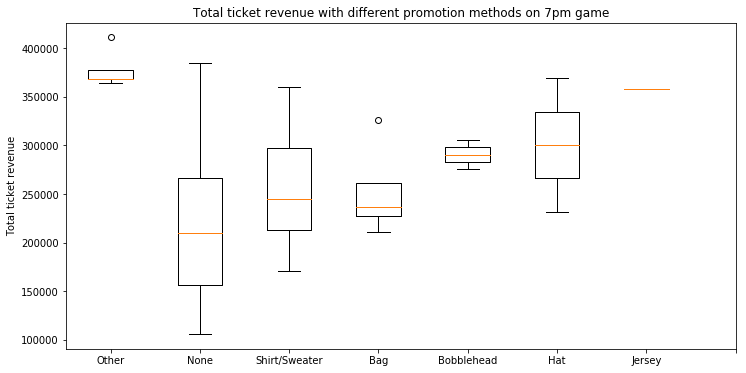

In [538]:
fig = plt.figure(1, figsize=(12, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplot_7pm_rev)
plt.xticks(np.arange(1,9),promotion_methods)
plt.title('Total ticket revenue with different promotion methods on 7pm game')
plt.ylabel('Total ticket revenue')

Text(0,0.5,'No-show rate')

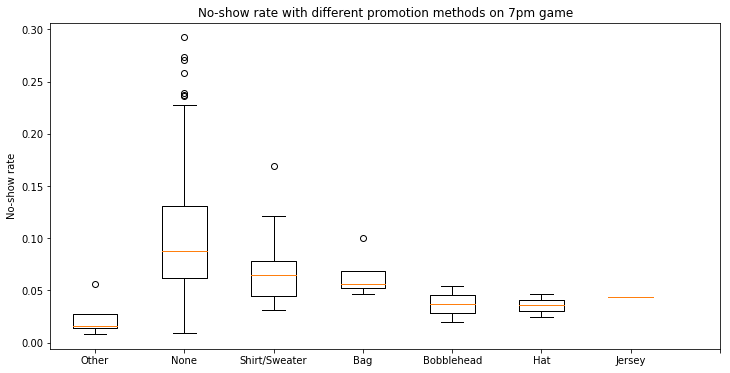

In [504]:
fig = plt.figure(1, figsize=(12, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boxplot_7pm_noshow)
plt.xticks(np.arange(1,9),promotion_methods)
plt.title('No-show rate with different promotion methods on 7pm game')
plt.ylabel('No-show rate')

<b> Observation of above figures </b>

Among all methods, hat and bobblehead were observed to be the best ways to increase attendance and decrease no-show rate.

Regarding the total ticket revenues, they also seemed to have more positive impact, but the range of ticket revenues for them were not too different from no-promotion.

# Part I

Part I consists of hypothesis testing of promotion effect on ticket sales, pre-game revenue streams, and paid attendance

#### Hypothesis testing: Promotion effect on ticket sales

In [274]:
df_promotion = df[['Game Date',
                   'Promotion',
                   'Season Tickets Sold',
                   'Single Game Tickets Sold',
                   'Other Tickets Sold']]

df_promotion.set_index('Game Date',drop=True,inplace=True)

# extract data associated to promotion and no promotion
df_promo = df_promotion[df_promotion['Promotion'] != 'None']
df_no_promo = df_promotion[df_promotion['Promotion'] == 'None']

In [ ]:
# Hypothesis testing
# season ticket
t1, p1 = ttest_ind(df_promo['Season Tickets Sold'],df_no_promo['Season Tickets Sold'],equal_var=False)
# single game ticket
t2, p2 = ttest_ind(df_promo['Single Game Tickets Sold'],df_no_promo['Single Game Tickets Sold'],equal_var=False)
# other tickets
t3, p3 = ttest_ind(df_promo['Other Tickets Sold'],df_no_promo['Other Tickets Sold'],equal_var=False)

In [295]:
print('Hypothesis testing of season tickets sales ')
print('\n')
print("Hypothesis testing results: t = %g  p = %g" % (t1, p1))
if p1 < 0.05:
    print('Null hypothesis was rejected')
else:
    print('Alternative hypothesis was rejected')

Hypothesis testing of season tickets sales 


Hypothesis testing results: t = 5.28147  p = 3.38334e-07
Null hypothesis was rejected


In [298]:
print('Hypothesis testing of single game tickets sales')
print('\n')
print("Hypothesis testing results: t = %g  p = %g" % (t2, p2))
if p2 < 0.05:
    print('Null hypothesis was rejected')
else:
    print('Alternative hypothesis was rejected')

Hypothesis testing of single game tickets sales


Hypothesis testing results: t = 6.4975  p = 4.79813e-10
Null hypothesis was rejected


In [299]:
print('Hypothesis testing of other tickets sales')
print('\n')
print("Hypothesis testing results: t = %g  p = %g" % (t3, p3))
if p3 < 0.05:
    print('Null hypothesis was rejected')
else:
    print('Alternative hypothesis was rejected')

Hypothesis testing of other tickets sales


Hypothesis testing results: t = 6.0612  p = 1.24478e-08
Null hypothesis was rejected


#### Hypothesis testing: Promotion effect on pre-game revenue stream

In [539]:
df_pregame_rev = pd.read_excel('Data for Associate Exercise_GJ.xlsx',sheet_name=7)
df_pregame_rev.set_index('Game Date',drop=True,inplace=True)

columns = ['PA_query.Promotion','Food (Pregame)','Drinks (Pregame)','Merch.Pregame']
df_pregame_rev = df_pregame_rev[columns]

df_pregame_rev_promo = df_pregame_rev[df_pregame_rev['PA_query.Promotion'] != 'None']
df_pregame_rev_no_promo = df_pregame_rev[df_pregame_rev['PA_query.Promotion'] == 'None']

In [540]:
# Hypothesis testing
# season ticket
t1, p1 = ttest_ind(df_pregame_rev_promo['Food (Pregame)'],df_pregame_rev_no_promo['Food (Pregame)'],equal_var=False)
# single game ticket
t2, p2 = ttest_ind(df_pregame_rev_promo['Drinks (Pregame)'],df_pregame_rev_no_promo['Drinks (Pregame)'],equal_var=False)
# other tickets
t3, p3 = ttest_ind(df_pregame_rev_promo['Merch.Pregame'],df_pregame_rev_no_promo['Merch.Pregame'],equal_var=False)

In [541]:
print('Hypothesis testing of food (Pregame) revenue')
print('\n')
print("Hypothesis testing results: t = %g  p = %g" % (t1, p1))
if p1 < 0.05:
    print('Null hypothesis was rejected')
else:
    print('Alternative hypothesis was rejected')

Hypothesis testing of food (Pregame) revenue


Hypothesis testing results: t = 8.36651  p = 1.04038e-11
Null hypothesis was rejected


In [304]:
print('Hypothesis testing of drinks (Pregame) revenue')
print('\n')
print("Hypothesis testing results: t = %g  p = %g" % (t2, p2))
if p1 < 0.05:
    print('Null hypothesis was rejected')
else:
    print('Alternative hypothesis was rejected')

Hypothesis testing of drinks (Pregame) revenue


Hypothesis testing results: t = 6.07118  p = 1.23054e-07
Null hypothesis was rejected


In [305]:
print('Hypothesis testing of merchandise (Pregame) revenue')
print('\n')
print("Hypothesis testing results: t = %g  p = %g" % (t3, p3))
if p1 < 0.05:
    print('Null hypothesis was rejected')
else:
    print('Alternative hypothesis was rejected')

Hypothesis testing of merchandise (Pregame) revenue


Hypothesis testing results: t = 5.03885  p = 3.67023e-06
Null hypothesis was rejected


#### Hypothesis testing: Promotion effect on paid attendance 

In [478]:
df_promo_pa = df[['Game Date',
                   'Promotion',
                   'Paid Attendance']]

df_promo_pa.set_index('Game Date',drop=True,inplace=True)

df_promo = df_promo_pa[df_promo_pa['Promotion'] != 'None']
df_no_promo = df_promo_pa[df_promo_pa['Promotion'] == 'None']

In [479]:
t, p_val = ttest_ind(df_promo['Paid Attendance'],df_no_promo['Paid Attendance'],equal_var=False)

print('Hypothesis testing of Paid Attendance ')
print('\n')
print("Hypothesis testing results: t = %g  p = %g" % (t, p_val))
if p1 < 0.05:
    print('Null hypothesis was rejected')
else:
    print('Alternative hypothesis was rejected')

Hypothesis testing of season tickets sales 


Hypothesis testing results: t = 10.4987  p = 5.91249e-22
Null hypothesis was rejected


In [491]:
df_promo_pa = pd.get_dummies(df_promo_pa,drop_first=True)

columns = [ 'Promotion_Bobblehead', 
            'Promotion_Hat',
            'Promotion_Jersey', 
            'Promotion_Memorabilia',
            'Promotion_None', 
            'Promotion_Other',
            'Promotion_Shirt/Sweater',
            'Paid Attendance']
df_promo_pa = df_promo_pa[columns]

corr = df_promo_pa.corr()
corr = corr['Paid Attendance']
corr.drop('Paid Attendance',axis = 0, inplace = True)
corr.sort_values(ascending = False, inplace = True)

corr

Promotion_Bobblehead       0.189223
Promotion_Other            0.170656
Promotion_Hat              0.155659
Promotion_Memorabilia      0.142885
Promotion_Jersey           0.111974
Promotion_Shirt/Sweater    0.074791
Promotion_None            -0.370784
Name: Paid Attendance, dtype: float64

# Part II

In [456]:
df_part2 = pd.read_excel('Data for Associate Exercise_GJ.xlsx',sheet_name=7)
df_part2.set_index('Game Date',drop=True,inplace=True)

# removing the following columns because the column 'total game day revenue' already includes them 
df_part2 = df_part2.drop([
                         'Food (Pregame)',
                         'Food (In Game)', 
                         'Food (Total)', 
                         'Drinks (Pregame)',
                         'Drinks (In Game)', 
                         'Drinks (Total)', 
                         'Merch.Pregame', 
                         'Merch.In Game',
                         'PA_query.Total Ticket Revenue'],axis=1)

# create dummy variables
df_part2 = pd.get_dummies(df_part2,drop_first=True)

# dropping other promotion method to isolate bobblehead
df_part2.drop([  'PA_query.Promotion_Hat',
                 'PA_query.Promotion_Jersey', 
                 'PA_query.Promotion_Memorabilia',
                 'PA_query.Promotion_None', 
                 'PA_query.Promotion_Other',
                 'PA_query.Promotion_Shirt/Sweater'  
                ], axis = 1, inplace = True)

# export the excel sheet to an excel file
df_part2.to_excel('partII_GJ_dummy_vars.xlsx')

## Multivariate Regression

In [457]:
x = df_part2.drop('Total Game day revenue',axis=1) # dependent variables
y = df_part2['Total Game day revenue'] # target variable

# Constructing the model
model = sm.OLS(y,x) 
 
results = model.fit()

# report the summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Game day revenue   R-squared:                       0.996
Model:                                OLS   Adj. R-squared:                  0.994
Method:                     Least Squares   F-statistic:                     672.7
Date:                    Sat, 28 Dec 2019   Prob (F-statistic):          1.71e-115
Time:                            07:45:54   Log-Likelihood:                -1729.3
No. Observations:                     150   AIC:                             3537.
Df Residuals:                         111   BIC:                             3654.
Df Model:                              39                                         
Covariance Type:                nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
PA_query.Opener                       1.795e+05    3.5e+04      5.127      0.000     1.1e+05    2.49e+05
PA_query.Temp                         -855.0663    871.647     -0.981      0.329   -2582.293     872.161
PA_query.Playoff Odds                -1.382e+04   2.83e+04     -0.488      0.627      -7e+04    4.23e+04
PA_query.Paid Attendance                19.6005      1.024     19.135      0.000      17.571      21.630
PA_query.No-Show Rate                -6.123e+04   7.97e+04     -0.768      0.444   -2.19e+05    9.68e+04
PA_query.Day_Monday                  -3.915e+04   1.26e+04     -3.099      0.002   -6.42e+04   -1.41e+04
PA_query.Day_Saturday                 4.714e+04   1.48e+04      3.177      0.002    1.77e+04    7.65e+04
PA_query.Day_Sunday                   4.511e+04   1.56e+04      2.891      0.005    1.42e+04     7.6e+04
PA_query.Day_Thursday                -1.476e+04   1.01e+04     -1.465      0.146   -3.47e+04    5204.543
PA_query.Day_Tuesday                 -4.272e+04   9444.511     -4.523      0.000   -6.14e+04    -2.4e+04
PA_query.Day_Wednesday               -2.807e+04   9082.145     -3.091      0.003   -4.61e+04   -1.01e+04
PA_query.Month_August                 5.342e+04    1.7e+04      3.151      0.002    1.98e+04     8.7e+04
PA_query.Month_July                   4.796e+04   1.86e+04      2.583      0.011    1.12e+04    8.48e+04
PA_query.Month_June                   4.662e+04   1.44e+04      3.237      0.002    1.81e+04    7.52e+04
PA_query.Month_March                  2.621e+04   2.68e+04      0.977      0.331   -2.69e+04    7.94e+04
PA_query.Month_May                      1.6e+04    1.2e+04      1.339      0.183   -7682.211    3.97e+04
PA_query.Month_September              4.071e+04   1.75e+04      2.320      0.022    5941.665    7.55e+04
PA_query.Game Time_13:07:00           3.837e+04   2.01e+04      1.908      0.059   -1472.774    7.82e+04
PA_query.Game Time_15:37:00           8.338e+04   5.27e+04      1.583      0.116    -2.1e+04    1.88e+05
PA_query.Game Time_16:07:00           7.594e+04   2.13e+04      3.558      0.001    3.36e+04    1.18e+05
PA_query.Game Time_19:07:00           7.008e+04    1.6e+04      4.389      0.000    3.84e+04    1.02e+05
PA_query.Opponent_Halifax            -1108.9593   1.38e+04     -0.080      0.936   -2.84e+04    2.62e+04
PA_query.Opponent_Hamilton           -3.627e+04   1.22e+04     -2.978      0.004   -6.04e+04   -1.21e+04
PA_query.Opponent_Moncton            -2799.7222   1.46e+04     -0.192      0.848   -3.16e+04     2.6e+04
PA_query.Opponent_Montreal            2.447e+04   1.32e+04      1.856      0.066   -1654.612    5.06e+04
PA_query.Opponent_Ottawa              3.213e+04   1.17e+04      2.737      0.007    8866.701    5.5

<b> The R-squared score is close to 1, suggesting that ordinary least square method is able provide accurate representation of the data </b>

In [458]:
# Using the linear regression module from sklearn to predict the total game day revenue on 20th July, 2018

X_train, y_train = x[:120], y[:120]

X_test, y_test = x[120:], y[120:]

mdl_lr = LinearRegression()
mdl_lr.fit(X_train.values,y_train.values)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [459]:
July20_2018 = X_test.loc['2018-07-20']

July20_2018['PA_query.Promotion_Bobblehead'] = 1.0

y_pred = mdl_lr.predict(July20_2018.values.reshape(1, -1))

xtra_rev_gain = y_pred - y_test.iloc[1]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [460]:
print("the orginal total game day revenue of the game on 20th July,2018 is: ${}".format(int(y_test.iloc[1])))
print("the predicted total game day revenue of the game on 20th July,2018 is: ${}".format(int(y_pred[0])))
print("the extra revenue gain is: ${}".format(int(xtra_rev_gain[0])))

the orginal total game day revenue of the game on 20th July,2018 is: $335326
the predicted total game day revenue of the game on 20th July,2018 is: $368718
the extra revenue gain is: $33392


<b> Considering the cost of bobble head is $40,000 , the extra revenue gain would not cover the cost of it. As a result, the total game day revenue would actually be lower than the origial game day revenue </b>

# Part III

In [463]:
df_part3 = pd.read_excel('Data for Associate Exercise_GJ.xlsx',sheet_name=7)

df_dummies_part3 = pd.get_dummies(df_part3,drop_first=True)

#### Comparison of promotion methods on revenue generation and no-show rate reduction

comparing all promotion methods in terms of their impact on different revenue streams. This would allow for better understanding on whcih method is most impactful for revenue generation as well as no-show rate reduction

To quantify the impact on revenue, the correlation between the revenue stream and the promotion method was used as indicator. A higher correlation value corresponds to higher impact of the promotion 

Similarly, the correlation between the no-show rate and the promotion method was used as indicator. A lower correlation value corresponds to higher impact of the promotion 

In [464]:
columns = [ 'PA_query.Promotion_Bobblehead', 
            'PA_query.Promotion_Hat',
            'PA_query.Promotion_Jersey', 
            'PA_query.Promotion_Memorabilia',
            'PA_query.Promotion_None', 
            'PA_query.Promotion_Other',
            'PA_query.Promotion_Shirt/Sweater',
            'PA_query.No-Show Rate', 
            'Food (Pregame)',
            'Drinks (Pregame)', 
            'Merch.Pregame', 
            'PA_query.Total Ticket Revenue',
            'Total Game day revenue'
          ]
df_promotion = df_dummies_part3[columns]

In [465]:
corr = df_promotion.corr()

corr_columns = ['PA_query.No-Show Rate',
                'Food (Pregame)',
                'Drinks (Pregame)',
                'Merch.Pregame',
                'PA_query.Total Ticket Revenue',
                'Total Game day revenue']

corr = corr[corr_columns]
corr = corr.drop(['Food (Pregame)',
                  'Drinks (Pregame)',
                  'PA_query.No-Show Rate',
                  'Merch.Pregame',
                  'PA_query.Total Ticket Revenue',
                  'Total Game day revenue'
                 ],axis=0)

corr

,PA_query.No-Show Rate,Food (Pregame),Drinks (Pregame),Merch.Pregame,PA_query.Total Ticket Revenue,Total Game day revenue
PA_query.Promotion_Bobblehead,-0.162019,0.288454,0.251638,0.234518,0.177899,0.174580
PA_query.Promotion_Hat,-0.175955,0.220676,0.284993,0.206031,0.156085,0.173509
PA_query.Promotion_Jersey,-0.116429,0.281980,0.140079,0.147086,0.130676,0.124265
PA_query.Promotion_Memorabilia,-0.007772,0.116483,0.027350,0.148281,0.154759,0.150532
PA_query.Promotion_None,0.314818,-0.616788,-0.520058,-0.404344,-0.343832,-0.367013
PA_query.Promotion_Other,-0.117227,0.266675,0.157986,0.167058,0.116058,0.129242
PA_query.Promotion_Shirt/Sweater,-0.089765,0.172828,0.242347,0.002453,0.051029,0.066873


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

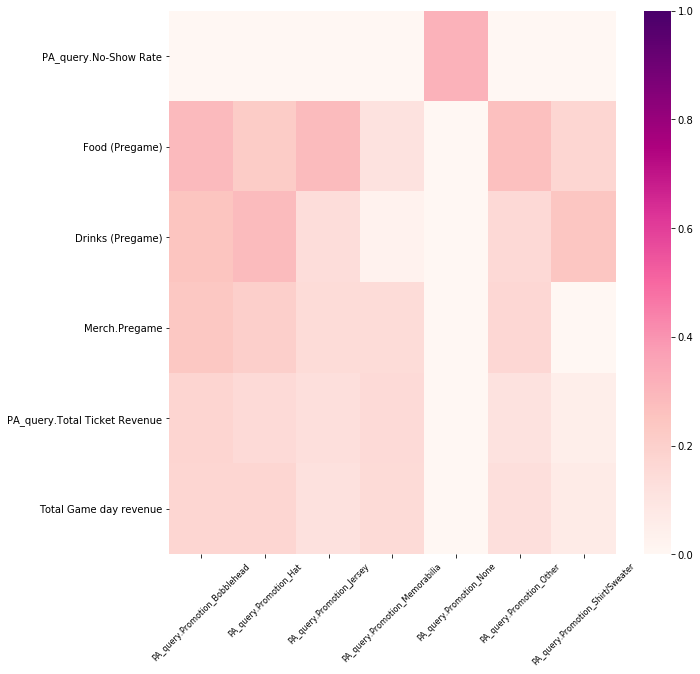

In [477]:
plt.figure(figsize = (10,10))
sns.heatmap(corr.transpose(), vmin=0, vmax=1, cmap ='RdPu')
plt.xticks(fontsize = 8,rotation = 45)

In [447]:
promotion_revenue_corr = corr['Total Game day revenue'].sort_values(ascending=False)
promotion_ticket_corr = corr['PA_query.Total Ticket Revenue'].sort_values(ascending=False)
promotion_merch_corr = corr['Merch.Pregame'].sort_values(ascending=False)
promotion_drinks_corr = corr['Drinks (Pregame)'].sort_values(ascending=False)
promotion_food_corr = corr['Food (Pregame)'].sort_values(ascending=False)

promotion_noshoww_corr = corr['PA_query.No-Show Rate'].sort_values(ascending=True)

In [448]:
# ranking of promotion method impact on total game day revenue
promotion_revenue_corr

PA_query.Promotion_Bobblehead       0.174580
PA_query.Promotion_Hat              0.173509
PA_query.Promotion_Memorabilia      0.150532
PA_query.Promotion_Other            0.129242
PA_query.Promotion_Jersey           0.124265
PA_query.Promotion_Shirt/Sweater    0.066873
PA_query.Promotion_None            -0.367013
Name: Total Game day revenue, dtype: float64

In [449]:
# ranking of promotion method impact on total tickets revenue
promotion_ticket_corr

PA_query.Promotion_Bobblehead       0.177899
PA_query.Promotion_Hat              0.156085
PA_query.Promotion_Memorabilia      0.154759
PA_query.Promotion_Jersey           0.130676
PA_query.Promotion_Other            0.116058
PA_query.Promotion_Shirt/Sweater    0.051029
PA_query.Promotion_None            -0.343832
Name: PA_query.Total Ticket Revenue, dtype: float64

In [450]:
# ranking of promotion method impact on food (pregame) revenue
promotion_food_corr

PA_query.Promotion_Bobblehead       0.288454
PA_query.Promotion_Jersey           0.281980
PA_query.Promotion_Other            0.266675
PA_query.Promotion_Hat              0.220676
PA_query.Promotion_Shirt/Sweater    0.172828
PA_query.Promotion_Memorabilia      0.116483
PA_query.Promotion_None            -0.616788
Name: Food (Pregame), dtype: float64

In [451]:
# ranking of promotion method impact on drinks (pregame) revenue
promotion_drinks_corr

PA_query.Promotion_Hat              0.284993
PA_query.Promotion_Bobblehead       0.251638
PA_query.Promotion_Shirt/Sweater    0.242347
PA_query.Promotion_Other            0.157986
PA_query.Promotion_Jersey           0.140079
PA_query.Promotion_Memorabilia      0.027350
PA_query.Promotion_None            -0.520058
Name: Drinks (Pregame), dtype: float64

In [452]:
# ranking of promotion method impact on merchandise (pregame) revenue
promotion_merch_corr

PA_query.Promotion_Bobblehead       0.234518
PA_query.Promotion_Hat              0.206031
PA_query.Promotion_Other            0.167058
PA_query.Promotion_Memorabilia      0.148281
PA_query.Promotion_Jersey           0.147086
PA_query.Promotion_Shirt/Sweater    0.002453
PA_query.Promotion_None            -0.404344
Name: Merch.Pregame, dtype: float64

In [453]:
# ranking of promotion method impact on no-show rate
promotion_noshoww_corr

PA_query.Promotion_Hat             -0.175955
PA_query.Promotion_Bobblehead      -0.162019
PA_query.Promotion_Other           -0.117227
PA_query.Promotion_Jersey          -0.116429
PA_query.Promotion_Shirt/Sweater   -0.089765
PA_query.Promotion_Memorabilia     -0.007772
PA_query.Promotion_None             0.314818
Name: PA_query.No-Show Rate, dtype: float64

#### Which factor is important to increase season tickets revenue?

Season tickets revenue was found to be the biggest driver for total ticket revenue as of 2018. The motivating factors behind Season tickets sales should then be investigated

The approach was to use Lasso regression to determine the most important factors.

In [223]:
df_szn_tickets_rev = df.copy()
df_szn_tickets_rev.set_index('Game Date',drop=True,inplace=True)

In [224]:
df_szn_tickets_rev.drop(['Season',
                         'Opener',
                         'Holiday',
                         'Game Time',
                         'Paid Attendance',
                         'Total Ticket Revenue',
                         'Season Ticket Revenue', 
                         'Single Game Tickets Sold',
                         'Single Game Ticket Revenue', 
                         'Other Tickets Sold',
                         'Other Ticket Revenue',
                         'Stadium Capacity',
                         'No-Show Rate'],axis=1,inplace=True)

df_szn_tickets_rev = pd.get_dummies(df_szn_tickets_rev,drop_first=True)

In [260]:
from sklearn.linear_model import Lasso

Lasso = Lasso(alpha=0.001,normalize=True)

In [261]:
x_lasso = df_szn_tickets_rev.drop('Season Tickets Sold',axis=1)
y_lasso = df_szn_tickets_rev['Season Tickets Sold']

Lasso.fit(x_lasso,y_lasso)

coef = pd.Series(Lasso.coef_, x_lasso.columns)
LassoVars = coef[coef >0].index

x_LassoVars = x_lasso[LassoVars]

Text(0.5,1,'Order of Features importance')

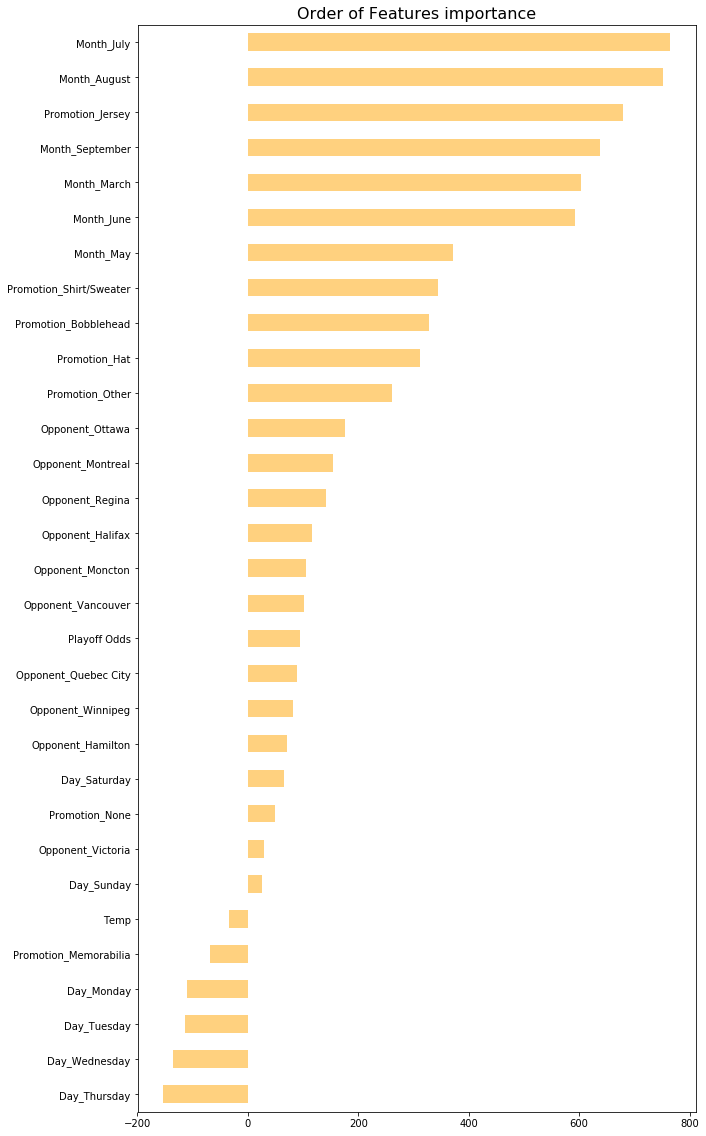

In [262]:
plt.figure(figsize = (10,20))
imp_coef = coef.sort_values()
imp_coef.plot(kind = 'barh',color='orange',alpha=0.5)
plt.title('Order of Features importance',fontsize = 16)

<b> Interpretation </b>

The most important factors for season ticket revenues were determined as the months during summer and fall as well as jersey promotion. 

Therefore, it's recommendd the promotion of season ticket sales should be empahsized during summer, with the aid of jersey giveaway